# K-Nearest Neighbors on the Seeds Dataset
Created on Sat Jan 18 21:42:54 2020
Seeds is a k-Nearest Neighbors model that attempts to classify a type of 
seed as either Kama, Rosa, or Canadian wheat by using seven geometric 
properties of the seeds. They are, according to their columns, 1)area 
2)perimeter 3)compactness (4*pi*A/p^2) 4)length 5)width 6)asymmetry 
coefficient 7)groove length 8)class. The data set used is "seeds" from the
UCI Machine Learning Repository. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [3]:
#Create a list for the class names:
classes=['Kama','Rosa','Canadian']

#Import the training set data and create a DataFrame:
seeds=pd.read_csv('seeds.csv')

#Assign the proper columns:
X=seeds.drop('class', axis=1).values
y=seeds['class'].values

#Split the data into training and test sets:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,\
                                                   random_state=11,stratify=y)


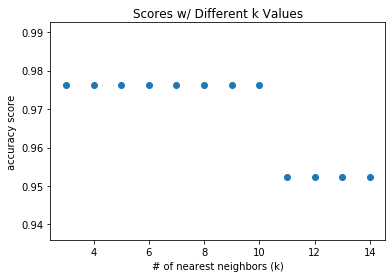

In [4]:
#Choose the best value for number of nearest neighbors:
"""The best score is for when n_neighbors=5 or 7. """
scr_lst=[]
for n in range(3,15):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    scr_lst.append(knn.score(X_test,y_test))

plt.figure()
plt.scatter(np.arange(3,15),scr_lst)
plt.title('Scores w/ Different k Values')
plt.xlabel('# of nearest neighbors (k)')
plt.ylabel('accuracy score')
plt.show()

In [7]:
#Create the classifier and fit to the training data:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

#Use the trained model to predict on unseen data:
prediction = list(knn.predict(X_test))

#Populate a list of names for the predictions:
pred_lst=[classes[int(i)-1] for i in prediction]

In [8]:
#Analyse the results:
score = round(knn.score(X_test,y_test),3)*100
comparison=prediction==y_test
results=list(zip(pred_lst,comparison))

#Print the results and analysis:
print('\nResults using a kNN approach:')
print(results,'\n\n Score:',score,'%')



Results using a kNN approach:
[('Rosa', True), ('Rosa', True), ('Canadian', True), ('Rosa', True), ('Kama', True), ('Kama', True), ('Canadian', True), ('Kama', True), ('Kama', True), ('Canadian', True), ('Kama', True), ('Rosa', True), ('Rosa', True), ('Canadian', True), ('Kama', True), ('Rosa', True), ('Canadian', True), ('Rosa', True), ('Canadian', True), ('Rosa', True), ('Kama', True), ('Canadian', True), ('Rosa', True), ('Canadian', True), ('Kama', True), ('Kama', True), ('Rosa', True), ('Kama', True), ('Kama', True), ('Rosa', True), ('Canadian', True), ('Kama', False), ('Rosa', True), ('Canadian', True), ('Kama', True), ('Canadian', True), ('Canadian', True), ('Canadian', True), ('Kama', True), ('Kama', True), ('Canadian', True), ('Rosa', True)] 

 Score: 97.6 %


# Conclusion
The model performs very well without any hyperparameter tuning or cross validation. The presence of 3 to 5 possible outliers or misclassifications are contributing to the missed predictions. The degree of overlap of certain features contributes as well, but not to near such a degree; the majority of neighbors will be in-class due to the natural clustering. This model could possibly give better results with more exploration. 